In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt

In [2]:
# use 90 stocks in the S&P 100 index. Grab the data and compute the returns.

oex = ['MMM','T','ABBV','ABT','ACN','ALL','GOOGL','GOOG','MO','AMZN','AXP','AIG','AMGN','AAPL','BAC',
       'BRK-B','BIIB','BLK','BA','BMY','CVS','COF','CAT','CVX','CSCO','C','KO','CL','CMCSA',
       'COP','DHR','DUK','DD','EMC','EMR','EXC','XOM','META','FDX','F','GD','GE','GM','GILD',
       'GS','HAL','HD','HON','INTC','IBM','JPM','JNJ','KMI','LLY','LMT','LOW','MA','MCD','MDT','MRK',
       'MET','MSFT','MS','NKE','NEE','OXY','ORCL','PYPL','PEP','PFE','PM','PG','QCOM',
       'SLB','SPG','SO','SBUX','TGT','TXN','BK','USB','UNP','UPS','UNH','VZ','V','WMT',
       'WBA','DIS','WFC']

num_stocks = len(oex)

data = yf.download(oex, start='2014-01-01', end='2016-04-04')

returns = data['Adj Close'].pct_change()
returns = returns - returns.mean(skipna=True) # de-mean the returns

[*********************100%***********************]  90 of 90 completed


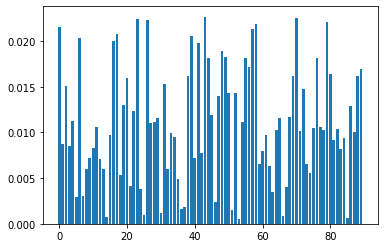

In [3]:
# Create a mock portfolio by generating random weights and multiplying them by the returns.

def scale(x):
    return x / np.sum(np.abs(x))

weights = scale(np.random.random(num_stocks))
plt.bar(np.arange(num_stocks),weights)

# Save the figure.
plt.savefig("./Images/randomWeights.jpg")

In [4]:
# value invested
value_invested = int(input())

 100000


In [5]:
# Compute VaR and CVaR
# Build a function for VaR so you can compare it to CVaR.

def value_at_risk(
    
    # take in the value invested in the portfolio, 
    # the returns of the stocks in the portfolio, 
    # the weights of the stocks in the portfolio, 
    # and an optional alpha value (which is set to 0.95 by default) 
    # and lookback period (which is set to 500 days by default). 
    # It calculates the VaR of the portfolio by de-meaning the returns, 
    # multiplying the returns by the weights, and then finding the 
    # percentile value corresponding to the given alpha value. 
    # The VaR is then calculated as the product of this percentile value 
    # and the value invested in the portfolio.
    
    value_invested, 
    returns, weights, 
    alpha=0.95, 
    lookback_days=500
):
    returns = returns.fillna(0.0)
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    
    return np.percentile(portfolio_returns, 100 * (1-alpha)) * value_invested

In [6]:
def cvar(

#     similar to the value_at_risk() function, but it calculates the CVaR 
#     instead of the VaR. It does this by first calculating the VaR
#     of the portfolio using the value_at_risk() function, then finding 
#     the percentage loss of the portfolio returns that are below the VaR, 
#     and finally taking the mean of these returns and multiplying it
#     by the value invested in the portfolio.

    value_invested, 
    returns, 
    weights, 
    alpha=0.95, 
    lookback_days=500
):
    var = value_at_risk(value_invested, returns, weights, alpha, lookback_days=lookback_days)
    
    returns = returns.fillna(0.0)
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    var_pct_loss = var / value_invested
    
    return np.nanmean(portfolio_returns[portfolio_returns < var_pct_loss]) * value_invested

In [7]:
# Compute the CVaR and VaR of the portfolio and note the difference.
print("CVaR:")
display(cvar(value_invested, returns, weights))
print()
print("VaR")
display(value_at_risk(value_invested, returns, weights))

CVaR:


-2077.7183729801477


VaR


-1576.4279283664966

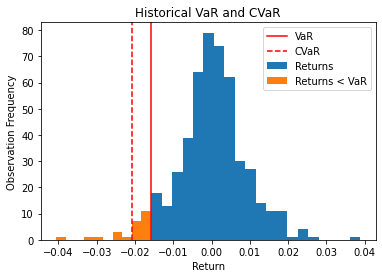

In [8]:
# If this still isn’t clear, a chart will help.
# plot a histogram of the returns of the portfolio, 
# with the VaR and CVaR of the portfolio marked on the chart.
# to visualize the difference between the VaR and the CVaR of the portfolio.

lookback_days = 500

portfolio_returns = returns.fillna(0.0).iloc[-lookback_days:].dot(weights)

portfolio_VaR = value_at_risk(value_invested, returns, weights)
portfolio_VaR_return = portfolio_VaR / value_invested

portfolio_CVaR = cvar(value_invested, returns, weights)
portfolio_CVaR_return = portfolio_CVaR / value_invested

plt.hist(portfolio_returns[portfolio_returns > portfolio_VaR_return], bins=20)
plt.hist(portfolio_returns[portfolio_returns < portfolio_VaR_return], bins=10)
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid')
plt.axvline(portfolio_CVaR_return, color='red', linestyle='dashed')
plt.legend(['VaR', 'CVaR', 'Returns', 'Returns < VaR'])
plt.title('Historical VaR and CVaR')
plt.xlabel('Return')
plt.ylabel('Observation Frequency')

# Save the figure.
plt.savefig("./Images/portfolioReturns.jpg")